In [85]:
from sentence_transformers import SentenceTransformer
import json
import numpy as np
import matplotlib.pyplot as plt

In [13]:
model = SentenceTransformer('distilbert-base-nli-mean-tokens')

In [34]:
kw_raw_text = """
Computer Architecture
Compilers
Parallel Computing
Artificial Intelligence
Machine Learning
Bioinformatics
Computational Biology
Databases
Data Mining
Information Retrieval
Interactive Computing
Programming Languages
Formal Methods
Software Engineering
Scientific Computing
Computer Security and Privacy
"""

kw_list_2 = kw_raw_text.split('\n')[1:-1]
kw_list_2


['Computer Architecture',
 'Compilers',
 'Parallel Computing',
 'Artificial Intelligence',
 'Machine Learning',
 'Bioinformatics',
 'Computational Biology',
 'Databases',
 'Data Mining',
 'Information Retrieval',
 'Interactive Computing',
 'Programming Languages',
 'Formal Methods',
 'Software Engineering',
 'Scientific Computing',
 'Computer Security and Privacy']

In [123]:
def generic(word):
    unprocessed_basis = model.encode(kw_list_2)
    basis_names = kw_list_2
    word_emb = model.encode(word).reshape(1,-1)
    diff = unprocessed_basis - word_emb
    diff_norm = np.linalg.norm(diff, axis=1)

    scores = diff_norm
    loc = np.where(diff_norm==np.min(diff_norm))[0][0]
    name = basis_names[loc]
    plt.bar(basis_names, scores)
    plt.xticks(rotation=90)
    plt.show()
    return scores, name, loc

# Interpreting the graph:
### y-axis: Euclidean embedding distance between each subfield and the word
### x-axis: CS subfields



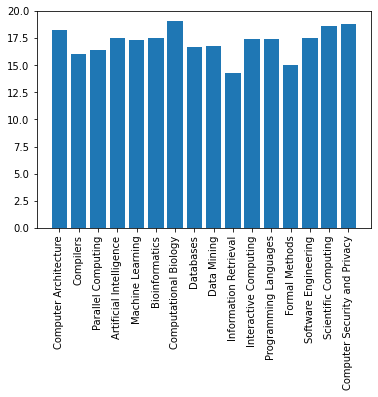

(array([18.264585, 16.035767, 16.38971 , 17.532085, 17.294415, 17.464174,
        19.064623, 16.679321, 16.757425, 14.235334, 17.421822, 17.434546,
        14.990921, 17.494802, 18.629545, 18.767315], dtype=float32),
 'Information Retrieval',
 9)

In [142]:
generic('model')

# Interpreting the return value: 
### array: distance of each subfield
### subfields with the smallest distance
### Index of the subfield

In [148]:
emb = model.encode(kw_list_2)
np.linalg.norm(emb, axis=1)

array([17.050848, 16.824167, 16.97293 , 17.042742, 17.016237, 16.491566,
       16.616795, 17.208515, 16.825348, 17.031199, 17.089014, 16.937204,
       17.25652 , 16.909523, 17.003113, 16.9585  ], dtype=float32)

In [149]:
emb = model.encode('query')
np.linalg.norm(emb)

17.355963

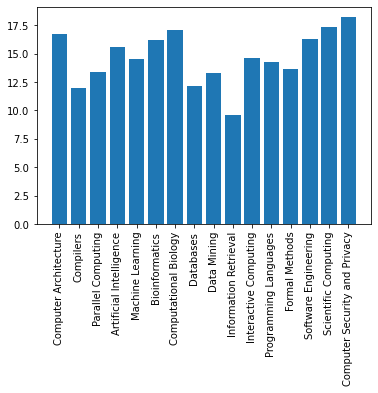

(array([16.702408, 11.943807, 13.398471, 15.53952 , 14.524186, 16.14969 ,
        17.058168, 12.139758, 13.324244,  9.636023, 14.633592, 14.234122,
        13.635645, 16.239561, 17.313   , 18.219816], dtype=float32),
 'Information Retrieval',
 9)

In [150]:
generic('query')

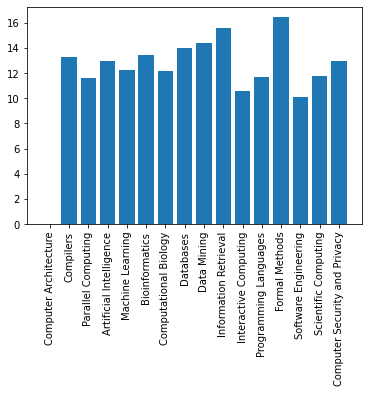

(array([ 0.      , 13.285536, 11.57737 , 12.952192, 12.278305, 13.463129,
       12.191174, 13.984509, 14.387469, 15.583857, 10.592414, 11.700533,
       16.457865, 10.060183, 11.759046, 12.919206], dtype=float32), 'Computer Architecture', 0)


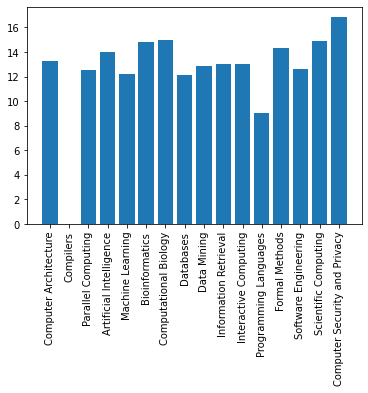

(array([13.285536 ,  0.       , 12.523415 , 14.022693 , 12.245096 ,
       14.84027  , 15.008164 , 12.106392 , 12.854238 , 13.0407915,
       12.988368 ,  9.003951 , 14.359587 , 12.608976 , 14.903431 ,
       16.847628 ], dtype=float32), 'Compilers', 1)


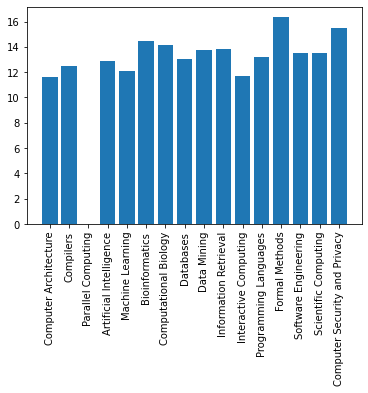

(array([11.57737  , 12.523415 ,  0.       , 12.893547 , 12.093546 ,
       14.4608345, 14.121076 , 13.027878 , 13.725249 , 13.850229 ,
       11.727955 , 13.166605 , 16.358805 , 13.548198 , 13.546869 ,
       15.47853  ], dtype=float32), 'Parallel Computing', 2)


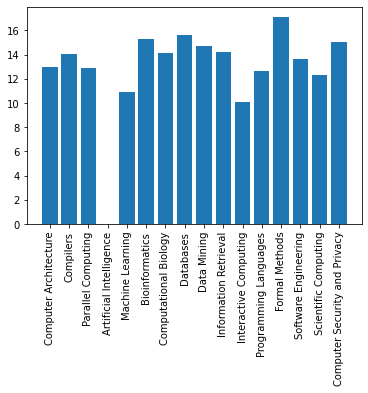

(array([12.952192 , 14.022693 , 12.893547 ,  0.       , 10.927464 ,
       15.324442 , 14.14518  , 15.6550255, 14.685701 , 14.244195 ,
       10.100087 , 12.647846 , 17.110865 , 13.60923  , 12.280442 ,
       15.063197 ], dtype=float32), 'Artificial Intelligence', 3)


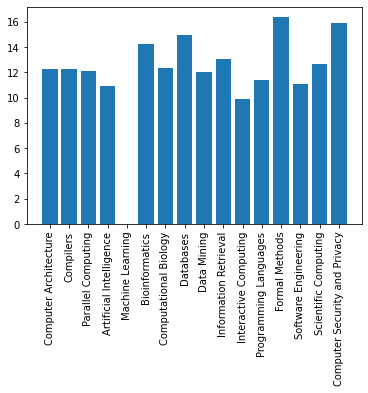

(array([12.278305, 12.245096, 12.093546, 10.927464,  0.      , 14.248513,
       12.339427, 14.977197, 11.998989, 13.079203,  9.894716, 11.377946,
       16.37853 , 11.103921, 12.632033, 15.900571], dtype=float32), 'Machine Learning', 4)


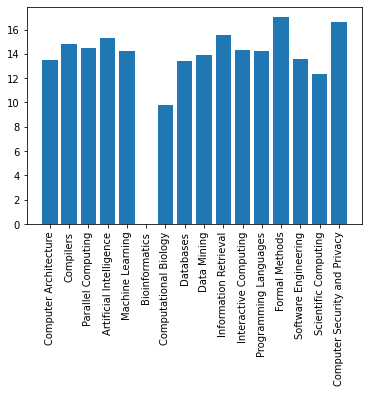

(array([13.463129 , 14.84027  , 14.4608345, 15.324442 , 14.248513 ,
        0.       ,  9.830088 , 13.391036 , 13.887501 , 15.572475 ,
       14.341403 , 14.275039 , 17.03459  , 13.579618 , 12.32786  ,
       16.579891 ], dtype=float32), 'Bioinformatics', 5)


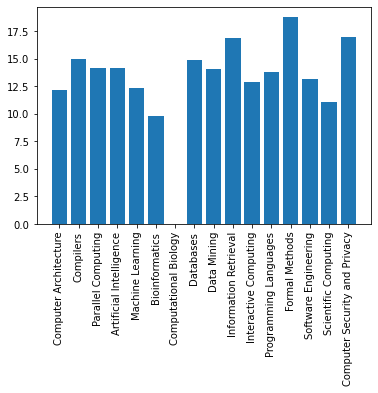

(array([12.191174, 15.008164, 14.121076, 14.14518 , 12.339427,  9.830088,
        0.      , 14.917591, 14.054748, 16.843449, 12.850534, 13.743924,
       18.775305, 13.128144, 11.09982 , 16.958792], dtype=float32), 'Computational Biology', 6)


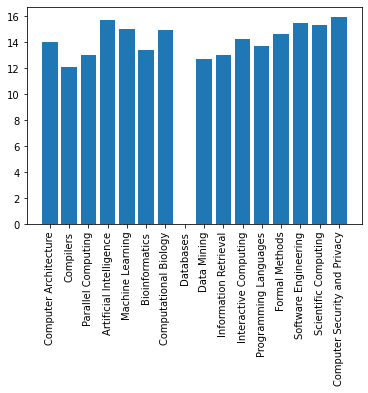

(array([1.3984510e+01, 1.2106391e+01, 1.3027879e+01, 1.5655026e+01,
       1.4977198e+01, 1.3391038e+01, 1.4917592e+01, 7.9827641e-06,
       1.2679929e+01, 1.2982835e+01, 1.4259421e+01, 1.3679201e+01,
       1.4638734e+01, 1.5457698e+01, 1.5271818e+01, 1.5920581e+01],
      dtype=float32), 'Databases', 7)


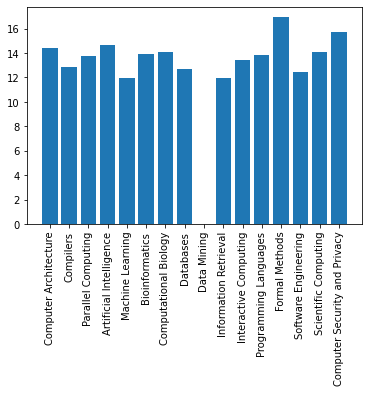

(array([14.387469 , 12.854238 , 13.725249 , 14.685701 , 11.998989 ,
       13.887501 , 14.054748 , 12.679927 ,  0.       , 11.934475 ,
       13.421576 , 13.882026 , 16.95616  , 12.478675 , 14.121559 ,
       15.7500305], dtype=float32), 'Data Mining', 8)


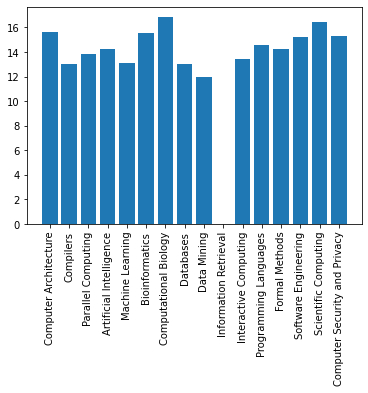

(array([15.583857 , 13.0407915, 13.850229 , 14.244195 , 13.079203 ,
       15.572475 , 16.843449 , 12.982835 , 11.934475 ,  0.       ,
       13.403064 , 14.541301 , 14.220071 , 15.195354 , 16.460299 ,
       15.302323 ], dtype=float32), 'Information Retrieval', 9)


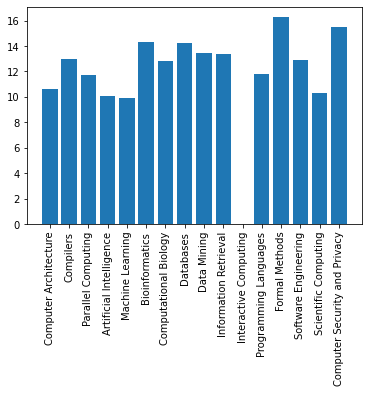

(array([10.592414, 12.988368, 11.727955, 10.100087,  9.894716, 14.341403,
       12.850534, 14.259421, 13.421576, 13.403064,  0.      , 11.768333,
       16.281569, 12.867777, 10.313743, 15.508879], dtype=float32), 'Interactive Computing', 10)


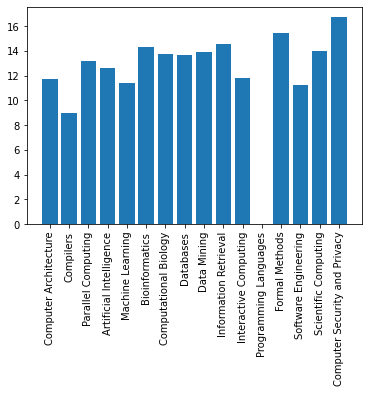

(array([11.700533,  9.003951, 13.166605, 12.647846, 11.377946, 14.275039,
       13.743924, 13.679202, 13.882026, 14.541301, 11.768333,  0.      ,
       15.434847, 11.231098, 13.993937, 16.742258], dtype=float32), 'Programming Languages', 11)


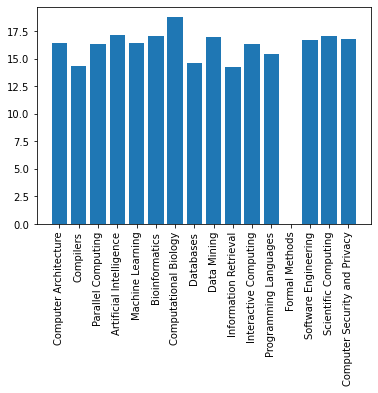

(array([16.457865, 14.359587, 16.358805, 17.110865, 16.37853 , 17.03459 ,
       18.775305, 14.638734, 16.95616 , 14.220071, 16.281569, 15.434847,
        0.      , 16.689653, 17.004232, 16.739656], dtype=float32), 'Formal Methods', 12)


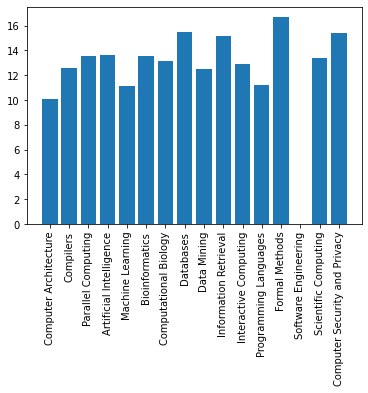

(array([10.060183, 12.608976, 13.548198, 13.60923 , 11.103921, 13.579618,
       13.128144, 15.457696, 12.478675, 15.195354, 12.867777, 11.231098,
       16.689653,  0.      , 13.42185 , 15.375677], dtype=float32), 'Software Engineering', 13)


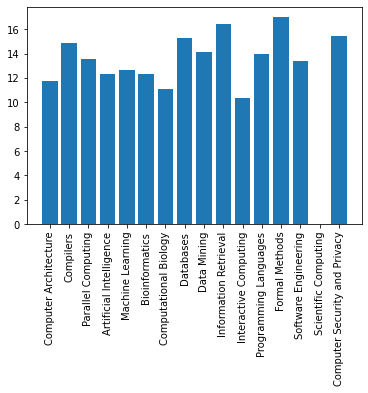

(array([11.759046, 14.903431, 13.546869, 12.280442, 12.632033, 12.32786 ,
       11.09982 , 15.271817, 14.121559, 16.460299, 10.313743, 13.993937,
       17.004232, 13.42185 ,  0.      , 15.416637], dtype=float32), 'Scientific Computing', 14)


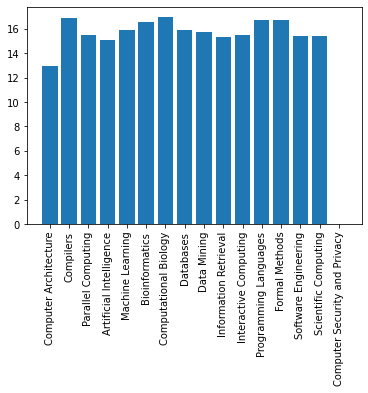

(array([12.919206 , 16.847628 , 15.47853  , 15.063197 , 15.900571 ,
       16.579891 , 16.958792 , 15.920579 , 15.7500305, 15.302323 ,
       15.508879 , 16.742258 , 16.739656 , 15.375677 , 15.416637 ,
        0.       ], dtype=float32), 'Computer Security and Privacy', 15)


In [155]:
for word in kw_list_2:
    print(generic(word))

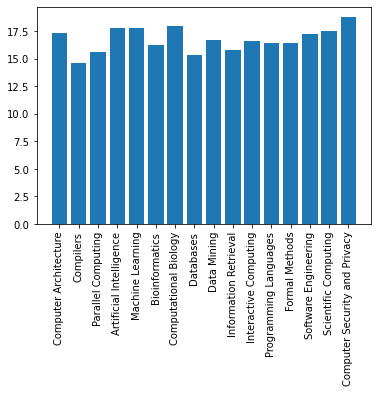

(array([17.359884 , 14.6414585, 15.616169 , 17.78009  , 17.774082 ,
        16.274904 , 17.993792 , 15.346004 , 16.699404 , 15.793798 ,
        16.587244 , 16.3908   , 16.384132 , 17.264063 , 17.47457  ,
        18.779922 ], dtype=float32),
 'Compilers',
 1)

In [157]:
generic('spreadsheet')

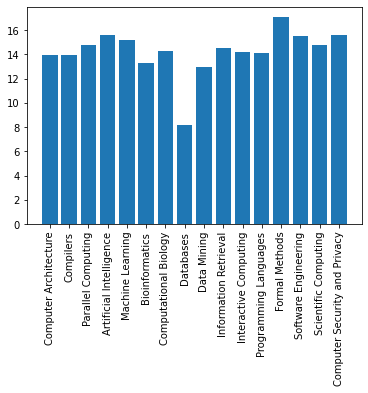

In [160]:
a, _, _ = generic('web databases')

In [162]:
sorted(a)[0]/sorted(a)[1]

0.6292974

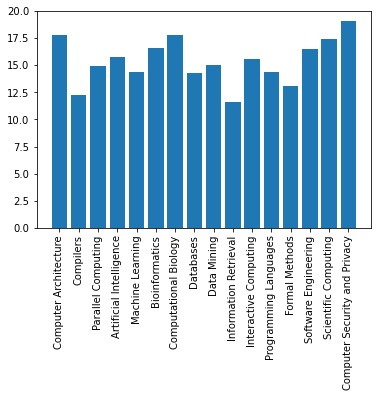

(array([17.820023, 12.24454 , 14.914859, 15.782181, 14.360108, 16.630228,
        17.797676, 14.302032, 15.017277, 11.600815, 15.546048, 14.372986,
        13.070168, 16.509933, 17.441555, 19.075117], dtype=float32),
 'Information Retrieval',
 9)

In [164]:
generic('methods')